# NSL-KDD Analysis

In [160]:
import os
from collections import defaultdict #dict subclass that calls a factory function to supply missing values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset exploration and processing
The  **NSLKDD dataset** dataset is an improvement to a original 1999 KDDCup dataset was created for the DARPA Intrusion Detection Evaluation Program, prepared and managed by MIT Lincoln Laboratory. 
The data was collected over nine weeks and consists of raw tcpdump traffic in a local area network (LAN) that simulates the environment of a typical United States Air Force LAN. 
Some network attacks were deliberately carried out during the recording period.

There were 38 different types of attacks, but only 24 are available in the training set. 
These attacks belong to four general categories
- `dos`: Denial of service
- `r2l`: Unauthorized accesses from remote servers
- `u2r`: Privilege escalation attempts 
- `probe`: Brute-force probing attacks

In [161]:
dataset_root = 'datasets/nsl-kdd'

In [162]:
train_file = os.path.join(dataset_root, 'KDDTrain+.txt')
test_file = os.path.join(dataset_root, 'KDDTest+.txt')

In [163]:
# Original KDD dataset feature names obtained from 
# http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
# http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']

In [164]:
pd.read_csv(train_file,names = header_names).describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,success_pred
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [165]:
# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names 
# file, but it is supposed to be a binary feature according to the 
# dataset documentation

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [166]:
# The mapping from attack labels to attack categories is specified in the file training_attack_types.txt.
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open('datasets/training_attack_types.txt', 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)
        
#invert the category dictionary in preparation for data processing
attack_mapping = dict((v,k) for k in category for v in category[k])

In [167]:
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

### analyzing training set and test set 

In [168]:
# Read training data
train_df = pd.read_csv(train_file, names=header_names)
train_df['attack_category'] = train_df['attack_type'].map(lambda x: attack_mapping[x])
train_df.drop(['success_pred'], axis=1, inplace=True) # not of interest

train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [169]:
# Read test data
test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'].map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True) # not of interest

test_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
#inspect attack_type and attack_category
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

print(train_attack_cats)

benign    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack_category, dtype: int64


In [231]:
#inspect attack_type and attack_category
test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

print(test_attack_cats)

benign    9711
dos       7636
r2l       2574
probe     2423
u2r        200
Name: attack_category, dtype: int64


<AxesSubplot:>

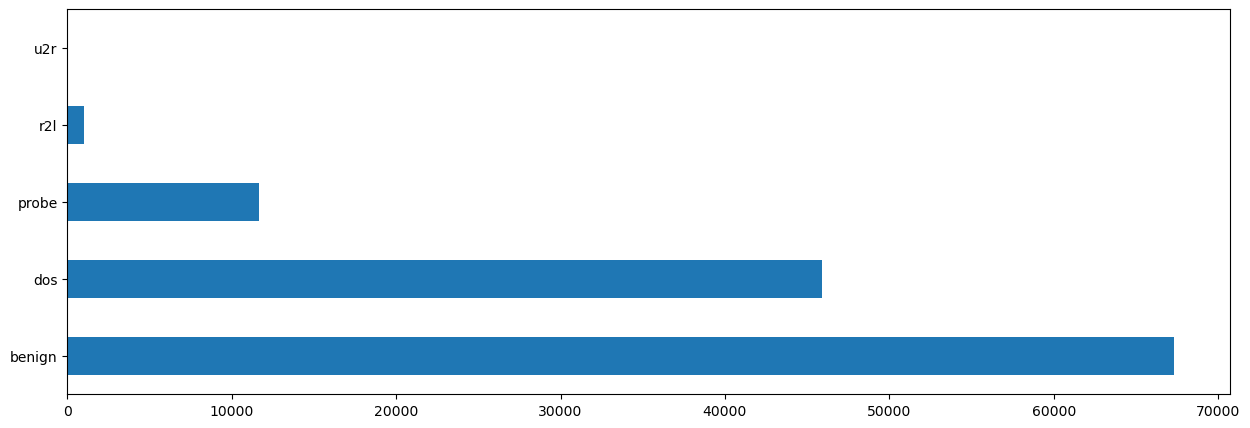

In [171]:
train_attack_cats.plot(kind='barh', figsize=(15,5), fontsize=10)

<AxesSubplot:>

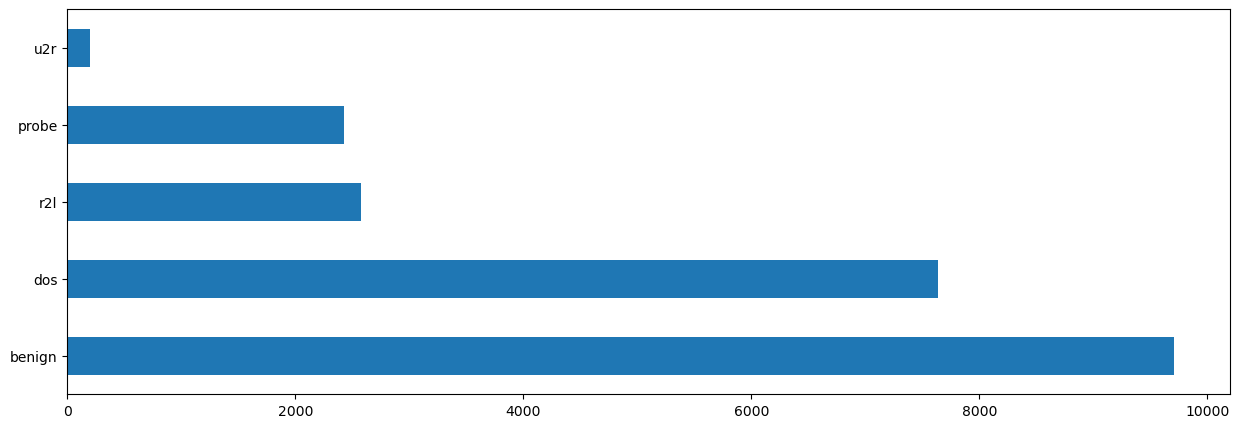

In [232]:
test_attack_cats.plot(kind='barh', figsize=(15,5), fontsize=10)

<AxesSubplot:>

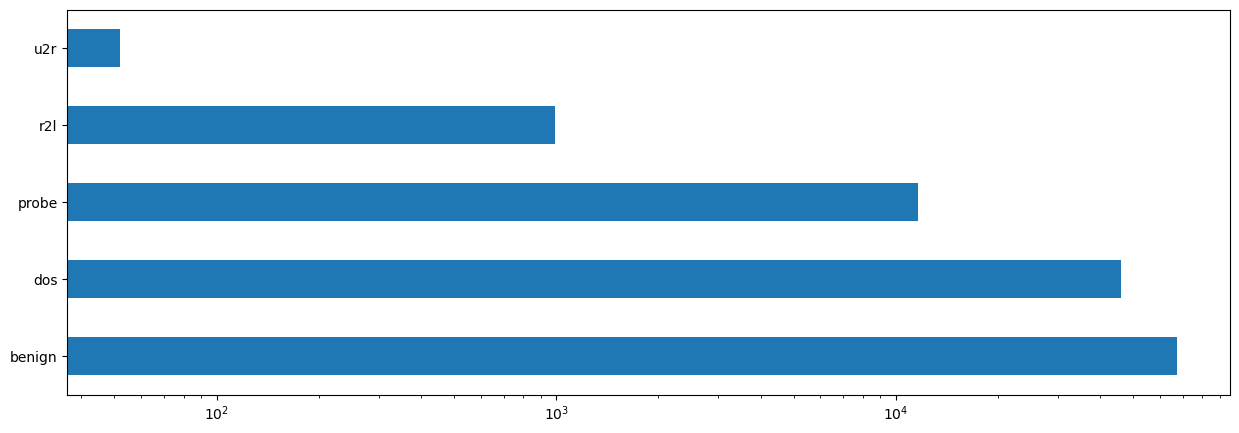

In [172]:
train_attack_cats.plot(kind='barh', logx = True,figsize=(15,5), fontsize=10)

<AxesSubplot:>

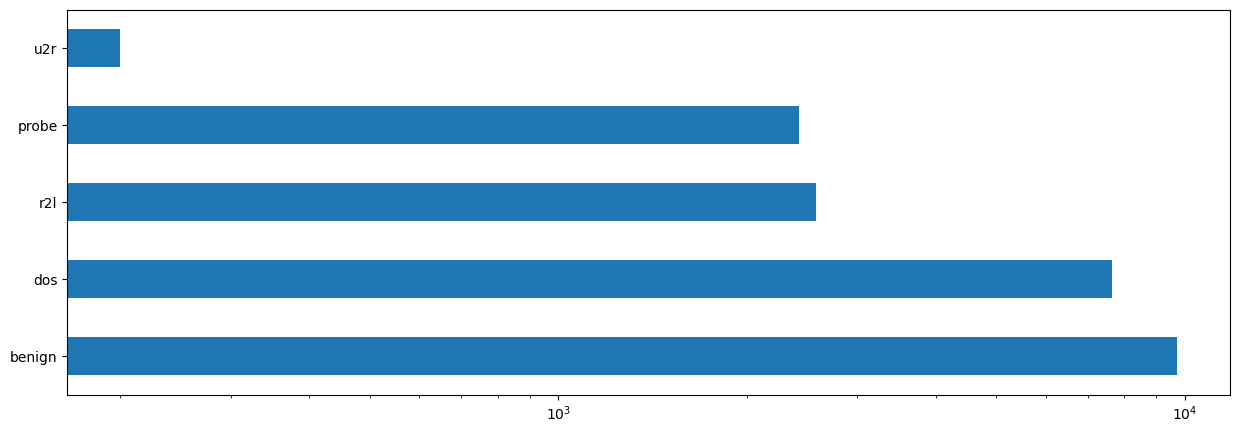

In [233]:
test_attack_cats.plot(kind='barh', logx = True,figsize=(15,5), fontsize=10)

<AxesSubplot:>

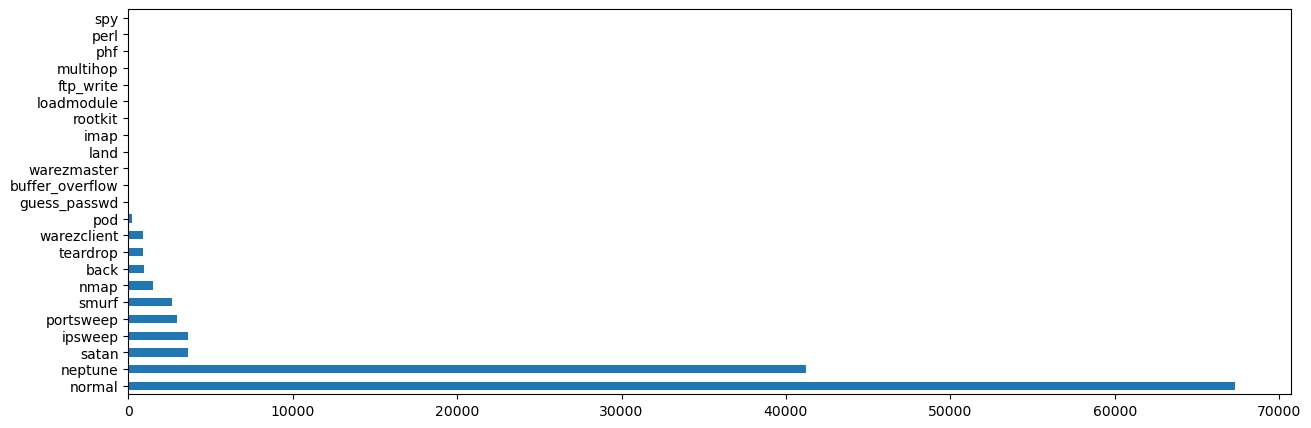

In [173]:
train_attack_types.plot(kind='barh', figsize=(15,5), fontsize=10)

<AxesSubplot:>

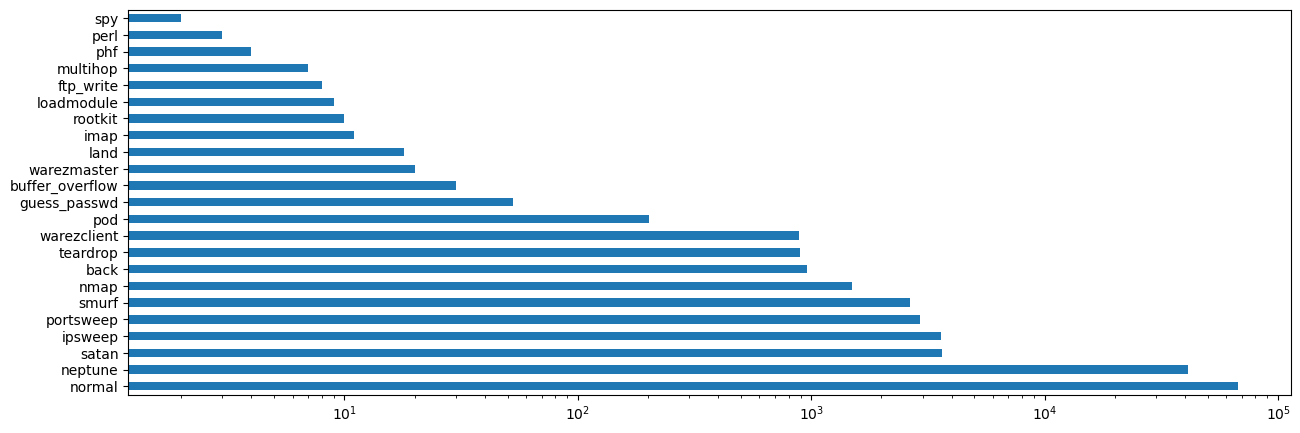

In [174]:
train_attack_types.plot(kind='barh', logx = True, figsize=(15,5), fontsize=10)

<AxesSubplot:>

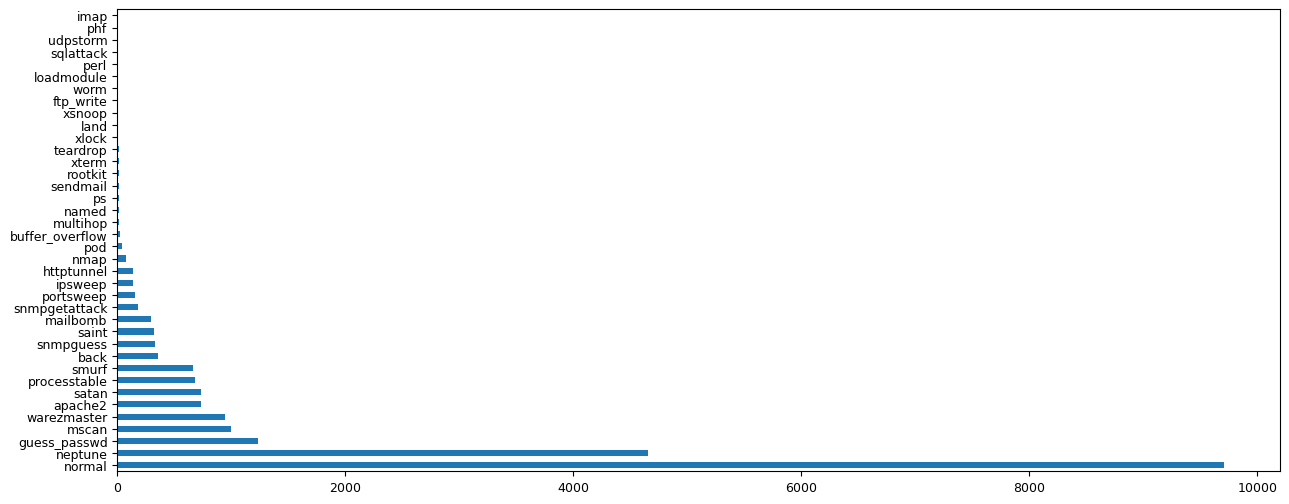

In [239]:
test_attack_types.plot(kind='barh', figsize=(15,6), fontsize=9)

<AxesSubplot:>

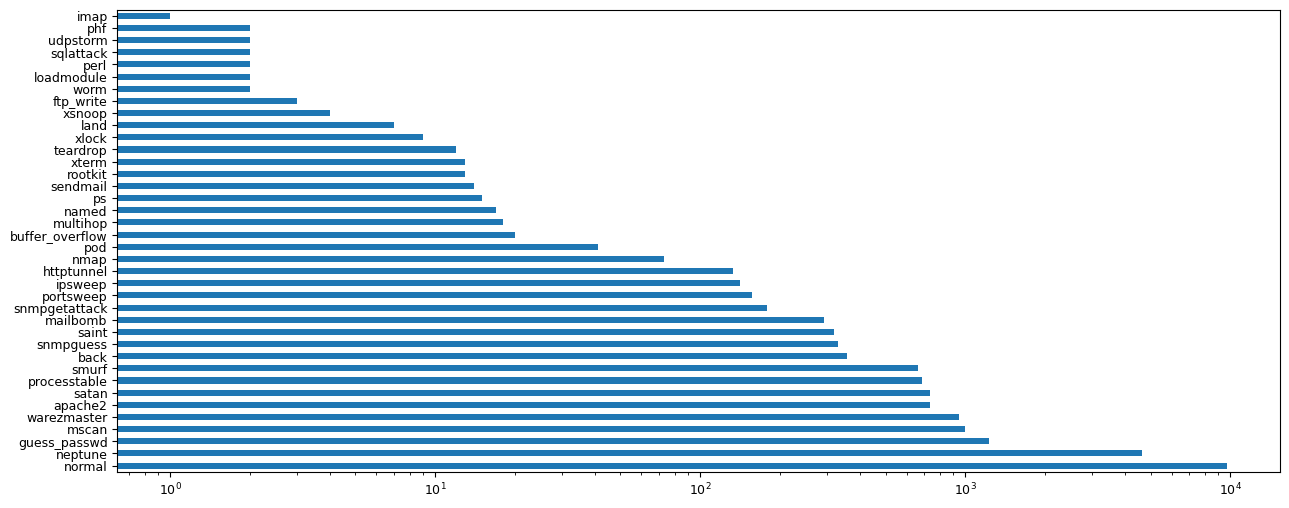

In [238]:
test_attack_types.plot(kind='barh', logx = True, figsize=(15,6), fontsize=9)

### Data cleaning

In [175]:
train_df[binary_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
land,125973.0,0.000198,0.014086,0.0,0.0,0.0,0.0,1.0
logged_in,125973.0,0.395736,0.489010,0.0,0.0,0.0,1.0,1.0
root_shell,125973.0,0.001342,0.036603,0.0,0.0,0.0,0.0,1.0
su_attempted,125973.0,0.001103,0.045154,0.0,0.0,0.0,0.0,2.0
is_host_login,125973.0,0.000008,0.002817,0.0,0.0,0.0,0.0,1.0
is_guest_login,125973.0,0.009423,0.096612,0.0,0.0,0.0,0.0,1.0


In [176]:
# The su_attempted column has a max value of 2.0

print(train_df.groupby(['su_attempted']).size())
print(test_df.groupby(['su_attempted']).size())

su_attempted
0    125893
1        21
2        59
dtype: int64
su_attempted
0    22540
1        2
2        2
dtype: int64


In [177]:
# fix this discrepancy assuming that su_attempted=2 -> su_attempted=0

train_df['su_attempted'].replace(2, 0, inplace=True)

#do the same for test set

test_df['su_attempted'].replace(2, 0, inplace=True)

print(train_df.groupby(['su_attempted']).size())
print(test_df.groupby(['su_attempted']).size())

su_attempted
0    125952
1        21
dtype: int64
su_attempted
0    22542
1        2
dtype: int64


In [178]:
train_df[numeric_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03
num_root,125973.0,0.302192,2.439962e+01,0.0,0.00,0.00,0.00,7.468000e+03
num_file_creations,125973.0,0.012669,4.839351e-01,0.0,0.00,0.00,0.00,4.300000e+01


In [179]:
# Next, we notice that the num_outbound_cmds column only takes on one value!

print(train_df.groupby(['num_outbound_cmds']).size())
print(test_df.groupby(['num_outbound_cmds']).size())

num_outbound_cmds
0    125973
dtype: int64
num_outbound_cmds
0    22544
dtype: int64


In [180]:
# Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)

numeric_cols.remove('num_outbound_cmds')

## Data preparation

In [181]:
#splitting the test and training dataframes into data and labels

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)

test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)

In [182]:
# Concatenate DataFrames
combined_df_raw = pd.concat([train_x_raw, test_x_raw])

In [183]:
# Generate dummy variables
# drop_first it helps in reducing the extra column created during dummy variable creation. 
# Hence it reduces the correlations created among dummy variables.
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

In [184]:
# Separate into training and test sets again
train_x = combined_df[:len(train_x_raw)].copy(deep=True)

test_x = combined_df[len(train_x_raw):].copy(deep=True)

In [185]:
# Keep track of dummy variables
dummy_variables = list(set(train_x)-set(combined_df_raw))

In [186]:
train_x.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.00000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,0.08917,0.012399,0.000818,0.019218,0.276655,0.002897,0.001008,0.000389,0.594929,0.002151
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,0.28499,0.110661,0.028583,0.137292,0.447346,0.053750,0.031736,0.019719,0.490908,0.046332
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [187]:
# Example statistics for the 'duration' feature before scaling
train_x['duration'].describe()

count    125973.00000
mean        287.14465
std        2604.51531
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       42908.00000
Name: duration, dtype: float64

In [188]:
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()


count    1.259730e+05
mean     3.916911e-16
std      1.000004e+00
min     -1.102492e-01
25%     -1.102492e-01
50%     -1.102492e-01
75%     -1.102492e-01
max      1.636428e+01
dtype: float64

In [189]:
# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()


count    125973.000000
mean          0.006692
std           0.060700
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
dtype: float64

In [190]:
# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler().fit(durations)
robust_scaled_durations = robust_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()


count    125973.00000
mean        287.14465
std        2604.51531
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       42908.00000
dtype: float64

In [191]:
# standardizing the training and test data with standard scaler

# Fit Scaler to the training data
standard_scaler = StandardScaler().fit(train_x[numeric_cols])

# Standardize training data
train_x[numeric_cols] = standard_scaler.transform(train_x[numeric_cols])

# Standardize test data with scaler fitted to training data
test_x[numeric_cols] = standard_scaler.transform(test_x[numeric_cols])

In [192]:
#Check if training set and test set have features in the same order
train_x.keys() == test_x.keys()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Classification

#### K fold cross validation

In [193]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold,cross_validate,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report,precision_recall_fscore_support,precision_score,recall_score, accuracy_score, make_scorer, f1_score
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


In [194]:
def retrieve_global_fscore_array(total_score):
    global_mean_fscore_array = [np.mean(i[2]) for i in total_score]
    return global_mean_fscore_array

#print the cross_val_report and average accuracy and average fscore
def print_crossval_report(total_score, accuracy_array, classes, folds):
    
    metrics = ['class','precision','recall','fscore','support']
    
    avg_score = np.round(np.mean(total_score,axis=0), 3)

    c_report_elem = []
    for elem,i in zip(classes, range(len(classes))):
        precision = avg_score[0][i]
        recall = avg_score[1][i]
        fscore = avg_score[2][i]
        suppport = avg_score[3][i]
        c_report_elem.append([elem,precision,recall,fscore, suppport])

    avg_classification_report = pd.DataFrame(c_report_elem, columns=metrics)
        
    avg_accuracy = np.round(np.mean(accuracy_array,axis=0), 3)
    avg_fscore = np.round(np.mean(avg_score[2]), 3)

    print(f'The classification report for {folds} folds :')
    print(avg_classification_report)
    print('')
    print(f'{"AVG ACCURACY:":10} {avg_accuracy}{",":10} {"AVG FSCORE:":10} {avg_fscore}')

#cross validation loop
def cross_validation_loop(df_data, target_label, folds, model):
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    # scoring
    total_score = []
    
    accuracy_array = []

    mc_fscore_res = []

    labels = target_label.unique()
    labels_len = len(target_label.unique())

    for (train_index, test_index) in skf.split(df_data, target_label):

        X_train, X_test = df_data.iloc[train_index], df_data.iloc[test_index]
        y_train, y_test = target_label.iloc[train_index], target_label.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy_array.append(accuracy_score(y_pred, y_test))

        total_score.append(precision_recall_fscore_support(y_test, y_pred, average=None, labels=labels))

    print_crossval_report(total_score, accuracy_array, labels, folds)

    mc_fscore_res = retrieve_global_fscore_array(total_score)

    return mc_fscore_res

In [195]:
#verifies class imbalance and choos sampling strategy

print(pd.Series(train_Y).value_counts())


benign    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack_category, dtype: int64


In [252]:
att_class = pd.Series(train_Y).value_counts()

probe_value = att_class['probe']
r2l_value = att_class['r2l']

rus_strategy = {'benign': probe_value,
         'dos': probe_value
        }

r2l_strategy = {
        'u2r': r2l_value
}

rus = RandomUnderSampler(sampling_strategy=rus_strategy, random_state=0, replacement=True)
train_x_rus, train_Y_rus = rus.fit_sample(train_x, train_Y)
print(pd.Series(train_Y_rus).value_counts())

print('')
print('After oversampling with r2l strategy:')
print('')

sm_r2l_strategy = SMOTE(sampling_strategy=r2l_strategy, random_state=0)

train_x_sm_r2l, train_Y_sm_r2l = sm_r2l_strategy.fit_sample(train_x_rus, train_Y_rus)
print(pd.Series(train_Y_sm_r2l).value_counts())

print('')
print('After oversampling with auto strategy:')
print('')

sm_auto_strategy = SMOTE(sampling_strategy='auto', random_state=0)

train_x_sm_auto, train_Y_sm_auto = sm_auto_strategy.fit_sample(train_x_rus, train_Y_rus)
print(pd.Series(train_Y_sm_auto).value_counts())


benign    11656
dos       11656
probe     11656
r2l         995
u2r          52
Name: attack_category, dtype: int64

After oversampling with r2l strategy:

benign    11656
dos       11656
probe     11656
r2l         995
u2r         995
Name: attack_category, dtype: int64

After oversampling with auto strategy:

benign    11656
dos       11656
probe     11656
r2l       11656
u2r       11656
Name: attack_category, dtype: int64


<AxesSubplot:>

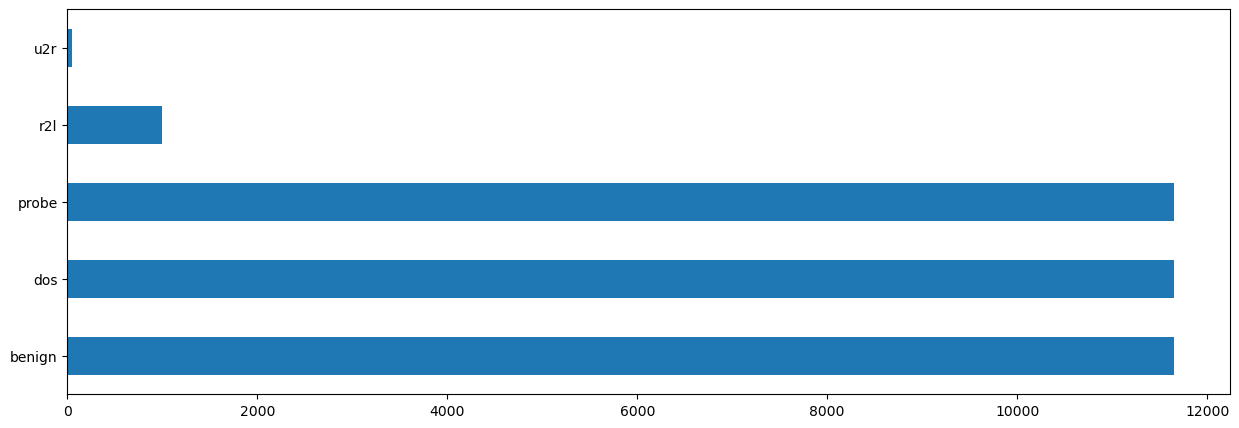

In [255]:
rus_res = pd.Series(train_Y_rus).value_counts()

rus_res.plot(kind='barh', figsize=(15,5), fontsize=10)

<AxesSubplot:>

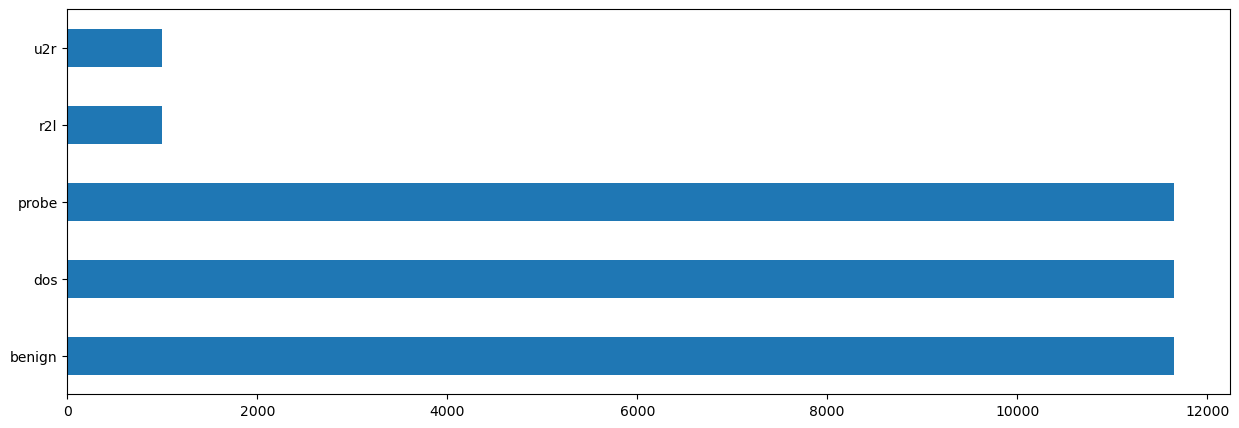

In [253]:
r2l_res = pd.Series(train_Y_sm_r2l).value_counts()

r2l_res.plot(kind='barh', figsize=(15,5), fontsize=10)

<AxesSubplot:>

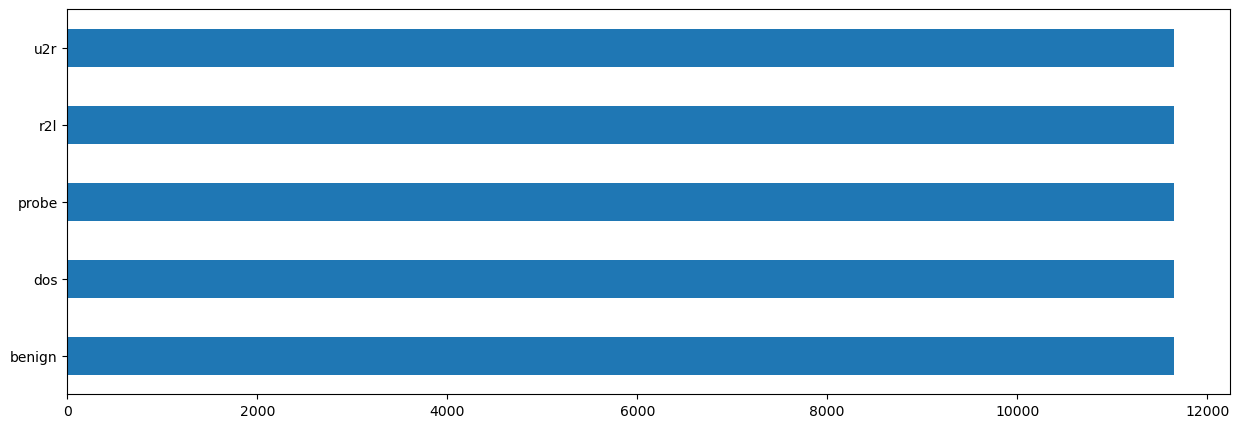

In [254]:
auto_res = pd.Series(train_Y_sm_auto).value_counts()

auto_res.plot(kind='barh', figsize=(15,5), fontsize=10)

### Decision Tree

In [197]:
depth = [10, 15, 20, 25]

dt_unb_fsc_res = []

for d in depth:
    print(f'Decision Tree {d} depth - unbalanced dataset:')
    dt_unb_fsc_res.append(cross_validation_loop(train_x, train_Y, 10, DecisionTreeClassifier(max_depth=d)))
    print('')


Decision Tree 10 depth - unbalanced dataset:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.995   0.999   0.997   6734.3
1     dos      0.999   0.999   0.999   4592.7
2     r2l      0.979   0.811   0.887     99.5
3   probe      0.994   0.993   0.994   1165.6
4     u2r      0.888   0.440   0.553      5.2

AVG ACCURACY: 0.997,          AVG FSCORE: 0.886

Decision Tree 15 depth - unbalanced dataset:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.997   0.999   0.998   6734.3
1     dos      0.999   0.999   0.999   4592.7
2     r2l      0.965   0.933   0.948     99.5
3   probe      0.996   0.993   0.994   1165.6
4     u2r      0.612   0.480   0.517      5.2

AVG ACCURACY: 0.998,          AVG FSCORE: 0.891

Decision Tree 20 depth - unbalanced dataset:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.998   0.998   0.998   6734.

In [198]:
dt_r2l_fsc_res = []

for d in depth:
    balanced_r2l_pipe_dt = Pipeline(steps=[
        ('rus', rus),
        ('sm', sm_r2l_strategy),
        ('model', DecisionTreeClassifier(max_depth=d))])
    
    print(f'Decision Tree {d} depth - balanced dataset r2l strategy:')
    dt_r2l_fsc_res.append(cross_validation_loop(train_x, train_Y, 10, balanced_r2l_pipe_dt))
    print('')

Decision Tree 10 depth - balanced dataset r2l strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.998   0.992   0.995   6734.3
1     dos      1.000   0.999   0.999   4592.7
2     r2l      0.917   0.927   0.922     99.5
3   probe      0.967   0.996   0.981   1165.6
4     u2r      0.497   0.827   0.611      5.2

AVG ACCURACY: 0.995,          AVG FSCORE: 0.902

Decision Tree 15 depth - balanced dataset r2l strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.999   0.994   0.997   6734.3
1     dos      1.000   0.999   0.999   4592.7
2     r2l      0.897   0.970   0.932     99.5
3   probe      0.982   0.997   0.989   1165.6
4     u2r      0.460   0.827   0.582      5.2

AVG ACCURACY: 0.996,          AVG FSCORE: 0.9

Decision Tree 20 depth - balanced dataset r2l strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign    

In [199]:
print(dt_r2l_fsc_res)

[[0.8882950319946815, 0.8886435267342678, 0.9362532016068605, 0.8974541937244556, 0.8991835578349064, 0.8955011446717952, 0.9042911126787658, 0.8870144329041233, 0.9195879832101437, 0.8996948694333341], [0.8853044668093869, 0.867598863179927, 0.9320809715513155, 0.8901061034277713, 0.9068382218887148, 0.8927292711045093, 0.8857889843469537, 0.9092218372169845, 0.9389700839281743, 0.889456758066277], [0.894518202330806, 0.8840442454047643, 0.9316968087676729, 0.8937232130252335, 0.903152156696807, 0.9067729275795552, 0.8619796081723574, 0.89238281920786, 0.9217959044293723, 0.8908254046854157], [0.875824186926704, 0.8908519981162509, 0.9335245337640659, 0.904869109335665, 0.8849443744368685, 0.8834098353586299, 0.8560976960763942, 0.8750513936395266, 0.9261104939913481, 0.8798990563745324]]


In [200]:
dt_auto_fsc_res = []

for d in depth:
    balanced_auto_pipe_dt = Pipeline(steps=[
        ('rus', rus),
        ('sm', sm_auto_strategy),
        ('model', DecisionTreeClassifier(max_depth=d))])
    
    print(f'Decision Tree {d} depth - balanced dataset auto strategy:')
    dt_auto_fsc_res.append(cross_validation_loop(train_x, train_Y, 10, balanced_auto_pipe_dt))
    print('')

Decision Tree 10 depth - balanced dataset auto strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.998   0.954   0.976   6734.3
1     dos      0.998   0.994   0.996   4592.7
2     r2l      0.311   0.975   0.467     99.5
3   probe      0.949   0.996   0.972   1165.6
4     u2r      0.123   0.750   0.210      5.2

AVG ACCURACY: 0.973,          AVG FSCORE: 0.724

Decision Tree 15 depth - balanced dataset auto strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.999   0.980   0.989   6734.3
1     dos      0.999   0.999   0.999   4592.7
2     r2l      0.526   0.974   0.680     99.5
3   probe      0.980   0.998   0.989   1165.6
4     u2r      0.203   0.787   0.312      5.2

AVG ACCURACY: 0.988,          AVG FSCORE: 0.794

Decision Tree 20 depth - balanced dataset auto strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benig

### K Nearest Neighbors


In [201]:
import warnings
warnings.filterwarnings('ignore')

In [202]:
knn_unb_fsc_res = []

neighbors = [3, 5, 10, 20]
for n in neighbors:
    print(f'KNN with {n} neighbors - unbalanced dataset:')
    knn_unb_fsc_res.append(cross_validation_loop(train_x, train_Y, 10, KNeighborsClassifier(n_neighbors=n, n_jobs=-1)))
    print('')

KNN with 3 neighbors - unbalanced dataset:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.997   0.998   0.997   6734.3
1     dos      0.999   0.999   0.999   4592.7
2     r2l      0.941   0.941   0.941     99.5
3   probe      0.994   0.991   0.993   1165.6
4     u2r      0.900   0.503   0.618      5.2

AVG ACCURACY: 0.997,          AVG FSCORE: 0.91

KNN with 5 neighbors - unbalanced dataset:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.996   0.998   0.997   6734.3
1     dos      0.999   0.999   0.999   4592.7
2     r2l      0.936   0.920   0.928     99.5
3   probe      0.994   0.990   0.992   1165.6
4     u2r      0.692   0.290   0.384      5.2

AVG ACCURACY: 0.996,          AVG FSCORE: 0.86

KNN with 10 neighbors - unbalanced dataset:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.994   0.997   0.996   6734.3
1    

In [203]:
knn_r2l_fsc_res = []

for n in neighbors:
    balanced_r2l_pipe_knn = Pipeline(steps=[
        ('rus', rus),
        ('sm', sm_r2l_strategy),
        ('model', KNeighborsClassifier(n_neighbors=n, n_jobs=-1))])
    
    print(f'KNN with {n} neighbors - balanced dataset r2l strategy:')
    knn_r2l_fsc_res.append(cross_validation_loop(train_x, train_Y, 10, balanced_r2l_pipe_knn))
    print('')

KNN with 3 neighbors - balanced dataset r2l strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.998   0.989   0.993   6734.3
1     dos      0.998   0.999   0.998   4592.7
2     r2l      0.817   0.958   0.881     99.5
3   probe      0.974   0.994   0.984   1165.6
4     u2r      0.245   0.733   0.356      5.2

AVG ACCURACY: 0.993,          AVG FSCORE: 0.842

KNN with 5 neighbors - balanced dataset r2l strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.998   0.988   0.993   6734.3
1     dos      0.997   0.998   0.998   4592.7
2     r2l      0.837   0.949   0.889     99.5
3   probe      0.969   0.994   0.981   1165.6
4     u2r      0.201   0.713   0.302      5.2

AVG ACCURACY: 0.992,          AVG FSCORE: 0.833

KNN with 10 neighbors - balanced dataset r2l strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0

In [204]:
knn_auto_fsc_res = []

for n in neighbors:
    balanced_auto_pipe_knn = Pipeline(steps=[
        ('rus', rus),
        ('sm', sm_auto_strategy),
        ('model', KNeighborsClassifier(n_neighbors=n, n_jobs=-1))])
    
    print(f'KNN with {n} neighbors - balanced dataset auto strategy:')
    knn_auto_fsc_res.append(cross_validation_loop(train_x, train_Y, 10, balanced_auto_pipe_knn))
    print('')

KNN with 3 neighbors - balanced dataset auto strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.998   0.985   0.991   6734.3
1     dos      0.998   0.999   0.998   4592.7
2     r2l      0.656   0.974   0.784     99.5
3   probe      0.973   0.994   0.984   1165.6
4     u2r      0.181   0.657   0.280      5.2

AVG ACCURACY: 0.99,          AVG FSCORE: 0.807

KNN with 5 neighbors - balanced dataset auto strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.998   0.981   0.989   6734.3
1     dos      0.997   0.998   0.998   4592.7
2     r2l      0.611   0.973   0.750     99.5
3   probe      0.968   0.994   0.981   1165.6
4     u2r      0.141   0.713   0.231      5.2

AVG ACCURACY: 0.988,          AVG FSCORE: 0.79

KNN with 10 neighbors - balanced dataset auto strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      

### Linear Support Vector Classification

In [205]:
lsvc_unb_fsc_res = []

c_param = [1, 5, 10, 20]
for c in c_param:
    print(f'Linear SVC C param = {c} - unbalanced dataset:')
    lsvc_unb_fsc_res.append(cross_validation_loop(train_x, train_Y, 10, LinearSVC(max_iter=10000, dual=False, C=c)))
    print('')

Linear SVC C param = 1 - unbalanced dataset:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.981   0.988   0.985   6734.3
1     dos      0.992   0.990   0.991   4592.7
2     r2l      0.823   0.701   0.755     99.5
3   probe      0.966   0.949   0.958   1165.6
4     u2r      0.758   0.370   0.472      5.2

AVG ACCURACY: 0.983,          AVG FSCORE: 0.832

Linear SVC C param = 5 - unbalanced dataset:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.983   0.988   0.986   6734.3
1     dos      0.992   0.993   0.992   4592.7
2     r2l      0.821   0.714   0.762     99.5
3   probe      0.967   0.950   0.958   1165.6
4     u2r      0.900   0.410   0.529      5.2

AVG ACCURACY: 0.984,          AVG FSCORE: 0.845

Linear SVC C param = 10 - unbalanced dataset:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.984   0.988   0.986   6734

In [221]:
lsvc_r2l_fsc_res = []

for c in c_param:
    balanced_r2l_pipe_lsvc = Pipeline(steps=[
        ('rus', rus),
        ('sm', sm_r2l_strategy),
        ('model', LinearSVC(max_iter=10000, dual=False, C=c))])
    
    print(f'Linear SVC C param = {c} neighbors - balanced dataset r2l strategy:')
    lsvc_r2l_fsc_res.append(cross_validation_loop(train_x, train_Y, 10, balanced_r2l_pipe_lsvc))
    print('')



Linear SVC C param = 1 neighbors - balanced dataset r2l strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.987   0.961   0.974   6734.3
1     dos      0.992   0.988   0.990   4592.7
2     r2l      0.577   0.900   0.703     99.5
3   probe      0.878   0.974   0.924   1165.6
4     u2r      0.194   0.547   0.279      5.2

AVG ACCURACY: 0.971,          AVG FSCORE: 0.774

Linear SVC C param = 5 neighbors - balanced dataset r2l strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.990   0.961   0.975   6734.3
1     dos      0.993   0.993   0.993   4592.7
2     r2l      0.592   0.902   0.714     99.5
3   probe      0.879   0.975   0.925   1165.6
4     u2r      0.150   0.563   0.231      5.2

AVG ACCURACY: 0.973,          AVG FSCORE: 0.768

Linear SVC C param = 10 neighbors - balanced dataset r2l strategy:
The classification report for 10 folds :
    class  precision  reca

In [222]:
lsvc_auto_fsc_res = []

for c in c_param:
    balanced_auto_pipe_lsvc = Pipeline(steps=[
        ('rus', rus),
        ('sm', sm_auto_strategy),
        ('model', LinearSVC(max_iter=10000, dual=False, C=c))])
    
    print(f'Linear SVC C param = {c} - balanced dataset auto strategy:')
    lsvc_auto_fsc_res.append(cross_validation_loop(train_x, train_Y, 10, balanced_auto_pipe_lsvc))
    print('')

Linear SVC C param = 1 - balanced dataset auto strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.986   0.920   0.952   6734.3
1     dos      0.992   0.986   0.989   4592.7
2     r2l      0.282   0.963   0.435     99.5
3   probe      0.854   0.976   0.911   1165.6
4     u2r      0.046   0.633   0.086      5.2

AVG ACCURACY: 0.95,          AVG FSCORE: 0.675

Linear SVC C param = 5 - balanced dataset auto strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.989   0.923   0.955   6734.3
1     dos      0.992   0.990   0.991   4592.7
2     r2l      0.291   0.958   0.446     99.5
3   probe      0.854   0.977   0.911   1165.6
4     u2r      0.051   0.673   0.096      5.2

AVG ACCURACY: 0.952,          AVG FSCORE: 0.68

Linear SVC C param = 10 - balanced dataset auto strategy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign

### Random Forest

In [208]:
rf_unb_fsc_res = []

estimators = [20, 40, 80, 100]
for e in estimators:
    print(f'Random Forest with {e} estimators - unbalanced dataset:')
    rf_unb_fsc_res.append(cross_validation_loop(train_x, train_Y, 10, RandomForestClassifier(n_estimators=e, n_jobs=-1)))
    print('')

Random Forest with 20 estimators - unbalanced dataset:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.998   1.000   0.999   6734.3
1     dos      1.000   1.000   1.000   4592.7
2     r2l      0.988   0.954   0.970     99.5
3   probe      0.999   0.996   0.997   1165.6
4     u2r      0.867   0.490   0.595      5.2

AVG ACCURACY: 0.999,          AVG FSCORE: 0.912

Random Forest with 40 estimators - unbalanced dataset:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.998   1.000   0.999   6734.3
1     dos      1.000   1.000   1.000   4592.7
2     r2l      0.994   0.959   0.976     99.5
3   probe      0.999   0.996   0.998   1165.6
4     u2r      0.913   0.547   0.654      5.2

AVG ACCURACY: 0.999,          AVG FSCORE: 0.925

Random Forest with 80 estimators - unbalanced dataset:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign     

In [209]:
rf_r2l_fsc_res = []

estimators = [20, 40, 80, 100]
for e in estimators:
    balanced_r2l_pipe_rf = Pipeline(steps=[
        ('rus', rus),
        ('sm', sm_r2l_strategy),
        ('model', RandomForestClassifier(n_estimators=e, n_jobs=-1))])
    
    print(f'Random Forest with {e} neighbors - balanced dataset r2l stretegy:')
    rf_r2l_fsc_res.append(cross_validation_loop(train_x, train_Y, 10, balanced_r2l_pipe_rf))
    print('')

Random Forest with 20 neighbors - balanced dataset r2l stretegy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.999   0.998   0.998   6734.3
1     dos      1.000   0.999   1.000   4592.7
2     r2l      0.948   0.969   0.958     99.5
3   probe      0.993   0.998   0.996   1165.6
4     u2r      0.602   0.810   0.680      5.2

AVG ACCURACY: 0.998,          AVG FSCORE: 0.926

Random Forest with 40 neighbors - balanced dataset r2l stretegy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.999   0.998   0.998   6734.3
1     dos      1.000   1.000   1.000   4592.7
2     r2l      0.952   0.969   0.960     99.5
3   probe      0.994   0.998   0.996   1165.6
4     u2r      0.564   0.813   0.662      5.2

AVG ACCURACY: 0.998,          AVG FSCORE: 0.923

Random Forest with 80 neighbors - balanced dataset r2l stretegy:
The classification report for 10 folds :
    class  precision  recall  

In [210]:
rf_auto_fsc_res = []

estimators = [20, 40, 80, 100]
for e in estimators:
    balanced_auto_pipe_rf = Pipeline(steps=[
        ('rus', rus),
        ('sm', sm_auto_strategy),
        ('model', RandomForestClassifier(n_estimators=e, n_jobs=-1))])
    
    print(f'Random Forest with {e} neighbors - balanced dataset auto stretegy:')
    rf_auto_fsc_res.append(cross_validation_loop(train_x, train_Y, 10, balanced_auto_pipe_rf))
    print('')

Random Forest with 20 neighbors - balanced dataset auto stretegy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.999   0.997   0.998   6734.3
1     dos      1.000   0.999   1.000   4592.7
2     r2l      0.922   0.973   0.946     99.5
3   probe      0.994   0.998   0.996   1165.6
4     u2r      0.622   0.790   0.693      5.2

AVG ACCURACY: 0.998,          AVG FSCORE: 0.927

Random Forest with 40 neighbors - balanced dataset auto stretegy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.999   0.997   0.998   6734.3
1     dos      1.000   0.999   1.000   4592.7
2     r2l      0.926   0.976   0.950     99.5
3   probe      0.994   0.998   0.996   1165.6
4     u2r      0.602   0.813   0.683      5.2

AVG ACCURACY: 0.998,          AVG FSCORE: 0.925

Random Forest with 80 neighbors - balanced dataset auto stretegy:
The classification report for 10 folds :
    class  precision  recal

### Gaussian Naive Bayes

In [211]:
gnb_unb_fsc_res = []

var_sm = [1e-7, 1e-9, 1e-11, 1e-13]

for vsm in var_sm:
    print(f'Gaussian Naive Bayes with var_smoothing = {vsm} - unbalanced dataset:')
    gnb_unb_fsc_res.append(cross_validation_loop(train_x, train_Y, 10, GaussianNB(var_smoothing=vsm)))
    print('')

Gaussian Naive Bayes with var_smoothing = 1e-07 - unbalanced dataset:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.877   0.886   0.882   6734.3
1     dos      0.981   0.948   0.964   4592.7
2     r2l      0.136   0.498   0.213     99.5
3   probe      0.972   0.405   0.571   1165.6
4     u2r      0.009   0.863   0.018      5.2

AVG ACCURACY: 0.861,          AVG FSCORE: 0.53

Gaussian Naive Bayes with var_smoothing = 1e-09 - unbalanced dataset:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.802   0.726   0.760   6734.3
1     dos      0.986   0.904   0.943   4592.7
2     r2l      0.049   0.503   0.086     99.5
3   probe      0.966   0.184   0.309   1165.6
4     u2r      0.008   0.863   0.017      5.2

AVG ACCURACY: 0.739,          AVG FSCORE: 0.423

Gaussian Naive Bayes with var_smoothing = 1e-11 - unbalanced dataset:
The classification report for 10 folds :
    class  preci

In [212]:
gnb_r2l_fsc_res = []

for vsm in var_sm:
    balanced_r2l_pipe_gnb = Pipeline(steps=[
        ('rus', rus),
        ('sm', sm_r2l_strategy),
        ('model', GaussianNB(var_smoothing=vsm))])
    
    print(f'Gaussian Naive Bayes with var_smoothing = {vsm} - balanced dataset r2l stretegy:')
    gnb_r2l_fsc_res.append(cross_validation_loop(train_x, train_Y, 10, balanced_r2l_pipe_gnb))
    print('')

Gaussian Naive Bayes with var_smoothing = 1e-07 - balanced dataset r2l stretegy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.894   0.895   0.894   6734.3
1     dos      0.980   0.965   0.972   4592.7
2     r2l      0.141   0.498   0.220     99.5
3   probe      0.955   0.445   0.607   1165.6
4     u2r      0.010   0.807   0.019      5.2

AVG ACCURACY: 0.875,          AVG FSCORE: 0.542

Gaussian Naive Bayes with var_smoothing = 1e-09 - balanced dataset r2l stretegy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.829   0.882   0.855   6734.3
1     dos      0.985   0.906   0.943   4592.7
2     r2l      0.108   0.500   0.177     99.5
3   probe      0.943   0.205   0.336   1165.6
4     u2r      0.009   0.807   0.018      5.2

AVG ACCURACY: 0.825,          AVG FSCORE: 0.466

Gaussian Naive Bayes with var_smoothing = 1e-11 - balanced dataset r2l stretegy:
The classification repo

In [213]:
gnb_auto_fsc_res = []

for vsm in var_sm:
    balanced_auto_pipe_gnb = Pipeline(steps=[
        ('rus', rus),
        ('sm', sm_auto_strategy),
        ('model', GaussianNB(var_smoothing=vsm))])
    
    print(f'Gaussian Naive Bayes with var_smoothing = {vsm} - balanced dataset auto stretegy:')
    gnb_auto_fsc_res.append(cross_validation_loop(train_x, train_Y, 10, balanced_auto_pipe_gnb))
    print('')

Gaussian Naive Bayes with var_smoothing = 1e-07 - balanced dataset auto stretegy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.933   0.893   0.912   6734.3
1     dos      0.976   0.935   0.955   4592.7
2     r2l      0.162   0.486   0.243     99.5
3   probe      0.797   0.678   0.726   1165.6
4     u2r      0.009   0.793   0.018      5.2

AVG ACCURACY: 0.885,          AVG FSCORE: 0.571

Gaussian Naive Bayes with var_smoothing = 1e-09 - balanced dataset auto stretegy:
The classification report for 10 folds :
    class  precision  recall  fscore  support
0  benign      0.846   0.897   0.871   6734.3
1     dos      0.982   0.915   0.948   4592.7
2     r2l      0.151   0.487   0.230     99.5
3   probe      0.946   0.322   0.478   1165.6
4     u2r      0.009   0.790   0.018      5.2

AVG ACCURACY: 0.847,          AVG FSCORE: 0.509

Gaussian Naive Bayes with var_smoothing = 1e-11 - balanced dataset auto stretegy:
The classification r

## Evaluate the models

### Unbalanced Data 

In [223]:
# DT [3] dp:25 f1:0.915, KNN [0] nb:3 f1:0.910, LSVC [1] c:5 f1:0.845
# RF [2] e:80 f1:0.930, GNB [0] v:1e-7 f1:0.530

from scipy.stats import wilcoxon

dt_vs_knn_unb = wilcoxon(dt_unb_fsc_res[3],knn_unb_fsc_res[0]) 
dt_vs_lsvc_unb = wilcoxon(dt_unb_fsc_res[3],lsvc_unb_fsc_res[1])
dt_vs_rf_unb = wilcoxon(dt_unb_fsc_res[3],rf_unb_fsc_res[2])
dt_vs_gnb_unb = wilcoxon(dt_unb_fsc_res[3],gnb_unb_fsc_res[0]) 

knn_vs_lsvc_unb = wilcoxon(knn_unb_fsc_res[0],lsvc_unb_fsc_res[1])
knn_vs_rf_unb = wilcoxon(knn_unb_fsc_res[0],rf_unb_fsc_res[2])
knn_vs_gnb_unb = wilcoxon(knn_unb_fsc_res[0],gnb_unb_fsc_res[0])

lsvc_vs_rf_unb = wilcoxon(lsvc_unb_fsc_res[1],rf_unb_fsc_res[2])
lsvc_vs_gnb_unb = wilcoxon(lsvc_unb_fsc_res[1],gnb_unb_fsc_res[0])

In [257]:
print(dt_unb_fsc_res[3])
print('')
print(gnb_unb_fsc_res[0])

[0.8774014175126819, 0.9006836300123098, 0.9288049566488598, 0.935503370964477, 0.9418232464209437, 0.9343489768724458, 0.8579602442072117, 0.9415110234292268, 0.9552022956668835, 0.878115018851515]

[0.5425407689867915, 0.5407654902513045, 0.5316573123175568, 0.5275751782612921, 0.5336925729545132, 0.5184223513537796, 0.5308154973319147, 0.5303969537723667, 0.5199954640487692, 0.5202765344895092]


In [224]:
print('Unbalanced Data')
print('')
print(f'DTvsKNN:{dt_vs_knn_unb}, DTvsLSVC:{dt_vs_lsvc_unb}, DTvsRF:{dt_vs_rf_unb}, DTvsGNB:{dt_vs_gnb_unb}')
print('')
print(f'KNNvsLSVC:{knn_vs_lsvc_unb}, KNNvsRF:{knn_vs_rf_unb}, KNNvsGNB:{knn_vs_gnb_unb}')
print('')
print(f'LSVCvsRF:{lsvc_vs_rf_unb}, LSVCvsGNB:{lsvc_vs_gnb_unb}')

Unbalanced Data

DTvsKNN:WilcoxonResult(statistic=23.0, pvalue=0.6953125), DTvsLSVC:WilcoxonResult(statistic=2.0, pvalue=0.005859375), DTvsRF:WilcoxonResult(statistic=18.0, pvalue=0.375), DTvsGNB:WilcoxonResult(statistic=0.0, pvalue=0.001953125)

KNNvsLSVC:WilcoxonResult(statistic=1.0, pvalue=0.00390625), KNNvsRF:WilcoxonResult(statistic=16.0, pvalue=0.275390625), KNNvsGNB:WilcoxonResult(statistic=0.0, pvalue=0.001953125)

LSVCvsRF:WilcoxonResult(statistic=0.0, pvalue=0.001953125), LSVCvsGNB:WilcoxonResult(statistic=0.0, pvalue=0.001953125)


### Balanced Data r2l Strategy

In [226]:
# DT [0] dp:10 f1:0.902, KNN [0] n:3 f1:0.842, LSVC [0] c:1 f1:0.774 
# RF [2] e:80 f1:0.930, GNB [0] v:1e-7 f1:0.542

from scipy.stats import wilcoxon

dt_vs_knn_r2l = wilcoxon(dt_r2l_fsc_res[0],knn_r2l_fsc_res[0]) 
dt_vs_lsvc_r2l = wilcoxon(dt_r2l_fsc_res[0],lsvc_r2l_fsc_res[0])
dt_vs_rf_r2l = wilcoxon(dt_r2l_fsc_res[0],rf_r2l_fsc_res[2])
dt_vs_gnb_r2l = wilcoxon(dt_r2l_fsc_res[0],gnb_r2l_fsc_res[0]) 

knn_vs_lsvc_r2l = wilcoxon(knn_r2l_fsc_res[0],lsvc_r2l_fsc_res[0])
knn_vs_rf_r2l = wilcoxon(knn_r2l_fsc_res[0],rf_r2l_fsc_res[2])
knn_vs_gnb_r2l = wilcoxon(knn_r2l_fsc_res[0],gnb_r2l_fsc_res[0])

lsvc_vs_rf_r2l = wilcoxon(lsvc_r2l_fsc_res[0],rf_r2l_fsc_res[2])
lsvc_vs_gnb_r2l = wilcoxon(lsvc_r2l_fsc_res[0],gnb_r2l_fsc_res[0])

In [227]:
print('Balanced Data r2l Strategy')
print('')
print(f'DTvsKNN:{dt_vs_knn_r2l}, DTvsLSVC:{dt_vs_lsvc_r2l}, DTvsRF:{dt_vs_rf_r2l}, DTvsGNB:{dt_vs_gnb_r2l}')
print('')
print(f'KNNvsLSVC:{knn_vs_lsvc_r2l}, KNNvsRF:{knn_vs_rf_r2l}, KNNvsGNB:{knn_vs_gnb_r2l}')
print('')
print(f'LSVCvsRF:{lsvc_vs_rf_r2l}, LSVCvsGNB:{lsvc_vs_gnb_r2l}')

Balanced Data r2l Strategy

DTvsKNN:WilcoxonResult(statistic=0.0, pvalue=0.001953125), DTvsLSVC:WilcoxonResult(statistic=0.0, pvalue=0.001953125), DTvsRF:WilcoxonResult(statistic=5.0, pvalue=0.01953125), DTvsGNB:WilcoxonResult(statistic=0.0, pvalue=0.001953125)

KNNvsLSVC:WilcoxonResult(statistic=0.0, pvalue=0.001953125), KNNvsRF:WilcoxonResult(statistic=0.0, pvalue=0.001953125), KNNvsGNB:WilcoxonResult(statistic=0.0, pvalue=0.001953125)

LSVCvsRF:WilcoxonResult(statistic=0.0, pvalue=0.001953125), LSVCvsGNB:WilcoxonResult(statistic=0.0, pvalue=0.001953125)


### Balanced Data auto Strategy

In [228]:
# DT [3] dp:25 f1:0.849, KNN [0] n:3 f1:0.807, LSVC [3] c:20 f1:0.681
# RF [2] e:80 f1:0.932, GNB [0] v:1e-7 f1:0.571

from scipy.stats import wilcoxon

dt_vs_knn_auto = wilcoxon(dt_auto_fsc_res[3],knn_auto_fsc_res[0]) 
dt_vs_lsvc_auto = wilcoxon(dt_auto_fsc_res[3],lsvc_auto_fsc_res[3])
dt_vs_rf_auto = wilcoxon(dt_auto_fsc_res[3],rf_auto_fsc_res[2])
dt_vs_gnb_auto = wilcoxon(dt_auto_fsc_res[3],gnb_auto_fsc_res[0]) 

knn_vs_lsvc_auto = wilcoxon(knn_auto_fsc_res[0],lsvc_auto_fsc_res[3])
knn_vs_rf_auto = wilcoxon(knn_auto_fsc_res[0],rf_auto_fsc_res[2])
knn_vs_gnb_auto = wilcoxon(knn_auto_fsc_res[0],gnb_auto_fsc_res[0])

lsvc_vs_rf_auto = wilcoxon(lsvc_auto_fsc_res[3],rf_auto_fsc_res[2])
lsvc_vs_gnb_auto = wilcoxon(lsvc_auto_fsc_res[3],gnb_auto_fsc_res[0])

In [229]:
print('Balanced Data auto Strategy')
print('')
print(f'DTvsKNN:{dt_vs_knn_auto}, DTvsLSVC:{dt_vs_lsvc_auto}, DTvsRF:{dt_vs_rf_auto}, DTvsGNB:{dt_vs_gnb_auto}')
print('')
print(f'KNNvsLSVC:{knn_vs_lsvc_auto}, KNNvsRF:{knn_vs_rf_auto}, KNNvsGNB:{knn_vs_gnb_auto}')
print('')
print(f'LSVCvsRF:{lsvc_vs_rf_auto}, LSVCvsGNB:{lsvc_vs_gnb_auto}')

Balanced Data auto Strategy

DTvsKNN:WilcoxonResult(statistic=0.0, pvalue=0.001953125), DTvsLSVC:WilcoxonResult(statistic=0.0, pvalue=0.001953125), DTvsRF:WilcoxonResult(statistic=0.0, pvalue=0.001953125), DTvsGNB:WilcoxonResult(statistic=0.0, pvalue=0.001953125)

KNNvsLSVC:WilcoxonResult(statistic=0.0, pvalue=0.001953125), KNNvsRF:WilcoxonResult(statistic=0.0, pvalue=0.001953125), KNNvsGNB:WilcoxonResult(statistic=0.0, pvalue=0.001953125)

LSVCvsRF:WilcoxonResult(statistic=0.0, pvalue=0.001953125), LSVCvsGNB:WilcoxonResult(statistic=0.0, pvalue=0.001953125)


### Train the selected models and make inference on the test set

#### train models with unbalaced trainset

In [258]:
unb_dt = DecisionTreeClassifier(max_depth=25)
unb_knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
unb_lsvc = LinearSVC(max_iter=10000, dual=False, C=5)
unb_rf = RandomForestClassifier(n_estimators=80, n_jobs=-1)
unb_gnb = GaussianNB(var_smoothing=1e-7)

unb_dt.fit(train_x, train_Y)



DecisionTreeClassifier(max_depth=25)

In [263]:
y_pred_unb_dt = unb_dt.predict(test_x)

In [261]:
print(test_Y.unique())

['dos' 'benign' 'probe' 'r2l' 'u2r']


In [264]:
print(classification_report(test_Y, y_pred_unb_dt, target_names = ['benign','dos','probe','r2l','u2r']))


              precision    recall  f1-score   support

      benign       0.66      0.96      0.78      9711
         dos       0.96      0.78      0.86      7636
       probe       0.79      0.64      0.71      2423
         r2l       0.96      0.07      0.12      2574
         u2r       0.68      0.07      0.14       200

    accuracy                           0.76     22544
   macro avg       0.81      0.50      0.52     22544
weighted avg       0.81      0.76      0.72     22544



#### train models with 'r2l' balanced trainset

#### train models with 'auto' balanced trainset